In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
import datetime

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Motive
## To analyze the customer behaviour to marketing campaign and build a clustering model for  segmentation of customers

## loading the data in dataframe 
* data is tab seprated 

* Attributes
* 
* People
* 
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* Products
* 
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
* Promotion
* 
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
* Place
* 
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
data=pd.read_csv(r'/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep="\t")

In [5]:
pd.set_option('display.max_columns',None)#to display total columns 

## data Cleaning

In [6]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1167,6263,1968,Graduation,Together,35322.0,1,2,22-08-2012,34,28,9,37,12,7,13,3,2,0,4,8,0,0,0,0,0,0,3,11,0
2010,2002,1958,Graduation,Divorced,71964.0,0,0,20-05-2013,81,587,51,932,180,34,86,1,5,6,5,3,0,0,0,0,0,0,3,11,0
1454,6875,1965,PhD,Together,32727.0,0,0,28-08-2012,38,167,13,180,86,13,70,2,7,3,5,8,0,0,0,0,0,0,3,11,0
452,6471,1971,Master,Single,36230.0,1,0,17-10-2013,17,14,2,30,8,2,3,1,2,0,4,5,0,0,0,0,0,0,3,11,0
989,453,1956,PhD,Widow,35340.0,1,1,29-06-2014,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,3,11,0


In [7]:
df=data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)# dropping the irrelevent columns .

In [8]:
df.shape

(2240, 26)

In [9]:
df.size

58240

In [10]:
df.columns=df.columns.str.lower()

In [11]:
df.isnull().sum() # only income column has null values

year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
dtype: int64

In [12]:
df.describe()['income']

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [13]:
df.loc[df.income.isnull()]

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [14]:
df.income.fillna(df.income.median(),inplace=True)

In [15]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_birth           2058 non-null   int64  
 1   education            2058 non-null   object 
 2   marital_status       2058 non-null   object 
 3   income               2058 non-null   float64
 4   kidhome              2058 non-null   int64  
 5   teenhome             2058 non-null   int64  
 6   dt_customer          2058 non-null   object 
 7   recency              2058 non-null   int64  
 8   mntwines             2058 non-null   int64  
 9   mntfruits            2058 non-null   int64  
 10  mntmeatproducts      2058 non-null   int64  
 11  mntfishproducts      2058 non-null   int64  
 12  mntsweetproducts     2058 non-null   int64  
 13  mntgoldprods         2058 non-null   int64  
 14  numdealspurchases    2058 non-null   int64  
 15  numwebpurchases      2058 non-null   i

In [17]:
df.corr()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
year_birth,1.000000,-0.160640,0.240870,-0.352072,-0.020873,-0.164164,-0.028870,-0.035391,-0.044364,-0.022053,-0.055136,-0.051978,-0.143020,-0.121290,-0.132081,0.123737,0.070229,-0.063939,0.010762,0.010449,0.000194,-0.025961,0.026067
income,-0.160640,1.000000,-0.425571,0.018995,-0.008671,0.562030,0.419937,0.565948,0.428483,0.426110,0.307433,-0.082032,0.365914,0.575367,0.513528,-0.539843,-0.017175,0.174030,0.328227,0.271966,0.085178,-0.026519,0.129882
kidhome,0.240870,-0.425571,1.000000,-0.046280,0.016657,-0.503256,-0.372094,-0.436947,-0.387030,-0.367285,-0.345281,0.213639,-0.367053,-0.500907,-0.503031,0.442490,0.009424,-0.164374,-0.209793,-0.183157,-0.085689,0.037681,-0.084259
teenhome,-0.352072,0.018995,-0.046280,1.000000,0.022406,0.006561,-0.178493,-0.260192,-0.197036,-0.162765,-0.019166,0.376607,0.147106,-0.109629,0.046512,0.128310,-0.043979,0.045235,-0.187157,-0.142779,-0.025800,-0.001674,-0.156990
recency,-0.020873,-0.008671,0.016657,0.022406,1.000000,0.011581,-0.010708,0.014214,-0.000718,0.020620,0.010132,0.005605,-0.011758,0.015053,-0.000200,-0.016980,-0.034050,0.023456,-0.002912,-0.023457,-0.009266,0.007340,-0.202877
mntwines,-0.164164,0.562030,-0.503256,0.006561,0.011581,1.000000,0.388175,0.554880,0.395760,0.380011,0.385986,0.014963,0.537243,0.626678,0.638452,-0.310833,0.064250,0.361078,0.465341,0.356954,0.199501,-0.037739,0.238926
mntfruits,-0.028870,0.419937,-0.372094,-0.178493,-0.010708,0.388175,1.000000,0.541054,0.593156,0.555291,0.397990,-0.134720,0.290716,0.486112,0.456825,-0.410645,0.012171,0.014509,0.219423,0.205511,-0.005047,-0.002205,0.130013
mntmeatproducts,-0.035391,0.565948,-0.436947,-0.260192,0.014214,0.554880,0.541054,1.000000,0.562618,0.516262,0.342998,-0.117584,0.284959,0.721638,0.471186,-0.530624,0.018130,0.090635,0.370764,0.315531,0.045759,-0.021833,0.236669
mntfishproducts,-0.044364,0.428483,-0.387030,-0.197036,-0.000718,0.395760,0.593156,0.562618,1.000000,0.579798,0.420316,-0.136341,0.290207,0.527883,0.463594,-0.437808,-0.010359,0.009584,0.193380,0.265339,0.003379,-0.018635,0.105880
mntsweetproducts,-0.022053,0.426110,-0.367285,-0.162765,0.020620,0.380011,0.555291,0.516262,0.579798,1.000000,0.375005,-0.118678,0.345140,0.484115,0.445538,-0.413380,-0.008164,0.027574,0.256205,0.249997,0.012978,-0.020849,0.118187


### summary
* Data is taken from kaggle.com and it is tab seprated
* There are 26 numerical columns ,3 object columns out of which year and dt_cutomer are date while martial status is object
* df is copy of data with irrelevent columns (3) removed,columns name have been converted in all lower case.
* income column has null values and there are also  duplicated values
* duplicates have been dropped
* Missing values  have been imputed by the median of income column.


## EDA and FE

In [18]:
df.year_birth.unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [19]:
df.loc[(df.year_birth == 1893) | (df.year_birth==1899)] #there seems to be an typing error in year_birth .

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [20]:
max_year=pd.to_datetime(df.dt_customer).dt.year.max()#getting the latest year in the dt customer to calculate age according to that value.
max_year

2014

In [21]:
age=max_year-df.year_birth

In [22]:
#creating a column for age of customer 
df.insert(1,'age',age)

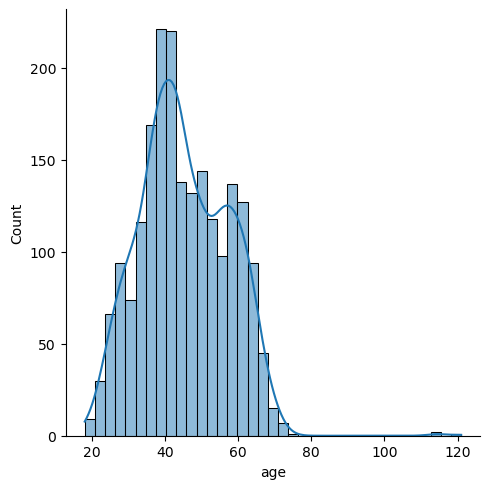

In [23]:
sns.displot(x=df.age,kde=True)

<AxesSubplot:xlabel='age'>

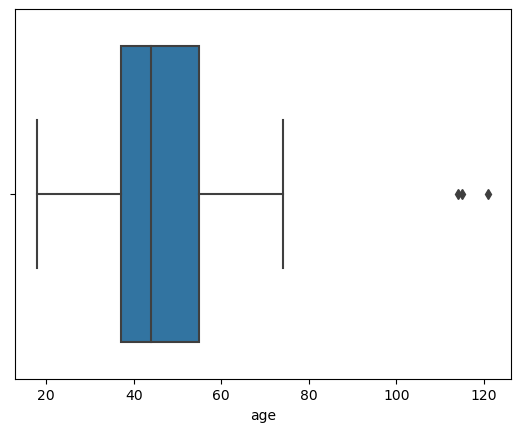

In [24]:
sns.boxplot(x=df.age)

In [25]:
df[df.age>100]# There are only three ouliers so we will replace it with upper limit using iqr technique

,year_birth,age,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,1900,114,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,121,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,115,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [26]:
iqr=df.age.quantile(0.75)-df.age.quantile(0.25)
upper_limit=df.age.quantile(0.75)+1.5* iqr
upper_limit

82.0

In [27]:
df.age[df.age>100]=upper_limit

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Frequency'>

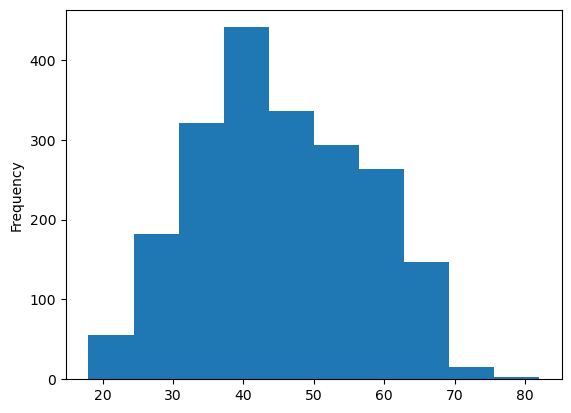

In [28]:
df.age.plot(kind='hist')

In [29]:
df.education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [30]:
y=df.groupby('education')['income'].sum()/df.education.value_counts()

<AxesSubplot:>

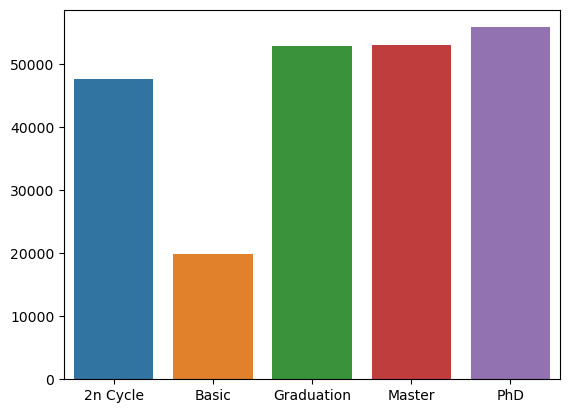

In [31]:
sns.barplot(x=y.index,y=y.values)#avg income for each education level

In [32]:
#new column education bracket
df.insert(3,'education_level',df.education.map({'Graduation':'medium_level','2n Cycle':'medium_level','Basic':'low_level','PhD':'high_level','Master':'high_level'}))

In [33]:
df.marital_status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [34]:
df.groupby('marital_status')['income'].sum().sort_values(ascending=False)

marital_status
Married     41249319.5
Together    27814021.5
Single      22812725.5
Divorced    11446200.0
Widow        4033675.5
Absurd        144731.0
Alone         131367.0
YOLO           96864.0
Name: income, dtype: float64

In [35]:
#partner column
partner=df.marital_status.map({'Together':1,'Married':1,'Single':0,'Divorced':0,'Widow':0,'Alone':0,'Absurd':0,'YOLO':0})

In [36]:
df.insert(5,'with_partner',partner)

<AxesSubplot:ylabel='Frequency'>

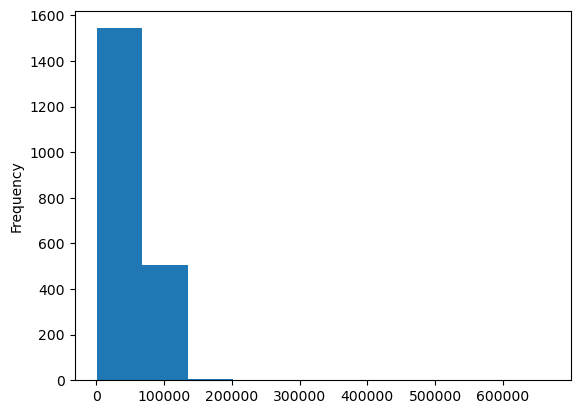

In [37]:
df.income.plot(kind='hist')

<AxesSubplot:>

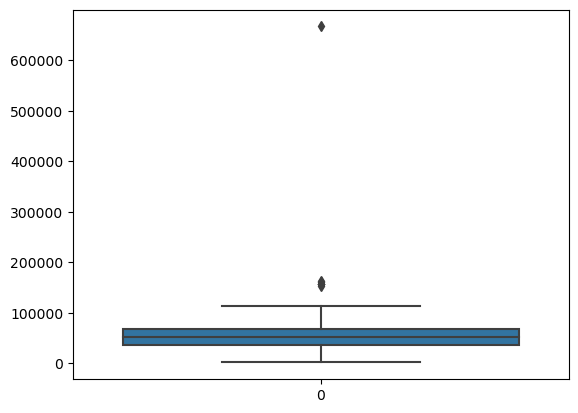

In [38]:
sns.boxplot(df.income)

In [39]:
iqr=df.income.quantile(0.75)-df.income.quantile(0.25)
up=df.income.quantile(0.75)+1.5* iqr
up

117053.625

In [40]:
df.income[df.income>up]=up

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

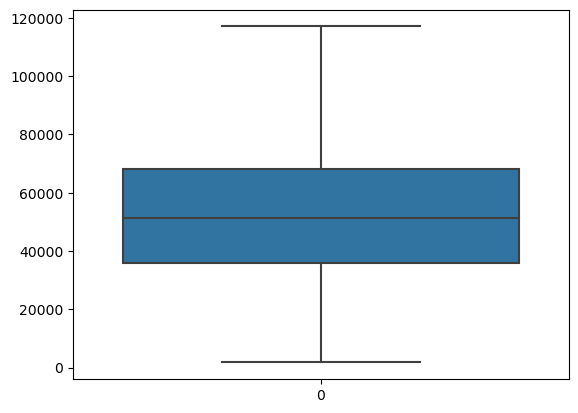

In [41]:
sns.boxplot(df.income)

In [42]:
#combine the kidhome and teenhome to form kids
df.insert(7,'children',df.kidhome + df.teenhome)

In [43]:
df.children.value_counts()

1    1045
0     577
2     388
3      48
Name: children, dtype: int64

In [44]:
#years of joining from dt_

In [45]:
y=df[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].sum()

In [46]:
x=['wine','fruit','meatproduct','fishs','sweets','gold']

<AxesSubplot:>

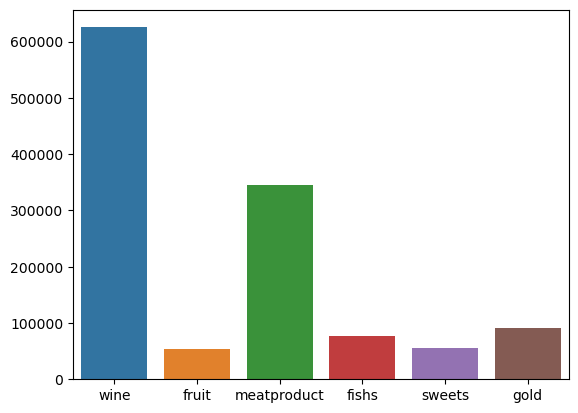

In [47]:
sns.barplot(x=x,y=y)

In [48]:
fre=df[['numwebpurchases','numcatalogpurchases','numstorepurchases']].sum()

In [49]:
place=['web purchase','catalog purchase','store purchase']

<AxesSubplot:>

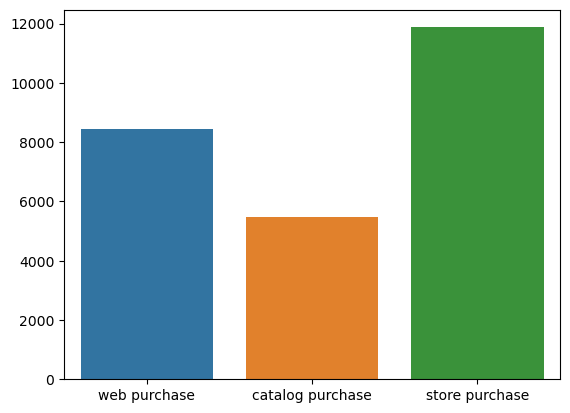

In [50]:
sns.barplot(x=place,y=fre)

In [51]:
df.head()

,year_birth,age,education,education_level,marital_status,with_partner,income,children,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,57,Graduation,medium_level,Single,0,58138.0,0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,60,Graduation,medium_level,Single,0,46344.0,2,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,49,Graduation,medium_level,Together,1,71613.0,0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,30,Graduation,medium_level,Together,1,26646.0,1,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,33,PhD,high_level,Married,1,58293.0,1,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [52]:
# combining the product_purchased
df.insert(12,'sum_of_purchases',df[['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']].sum(axis=1))
    

In [53]:
#no of purchase
df.insert(20,'total_purchases',df[['numwebpurchases','numcatalogpurchases','numstorepurchases']].sum(axis=1))

In [54]:
df.groupby('education_level')['recency'].mean()

education_level
high_level      48.141593
low_level       47.714286
medium_level    49.527915
Name: recency, dtype: float64

In [55]:
a=[]
for i in  (df[['acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2','response']].sum(axis=1)):
    if i==1:
        a.append(1)
    else:
        a.append(0)

In [56]:
df.insert(25,'offer',a)

 age_brackets

In [57]:
df[(df.age>20) & (df.age<35)].shape #young

(380, 33)

In [58]:
df[(df.age>35) & (df.age<50)].shape#middle

(899, 33)

In [59]:
df[(df.age>50) & (df.age<65)].shape#late_middle

(586, 33)

In [60]:
df[(df.age>65)].shape#older

(71, 33)

In [61]:
a=[]
def age_bracket():
    for i in df.age:
        if (i >20) & (i<=35):
            a.append('young')
        elif (i >35) & (i<=50):
            a.append('early_middle')
        elif (i >50) & (i<=65):
            a.append('late_middle')
        else:
            a.append('older_gen')

In [62]:
age_bracket()

In [63]:
df.insert(2,'age_bins',a)

<AxesSubplot:>

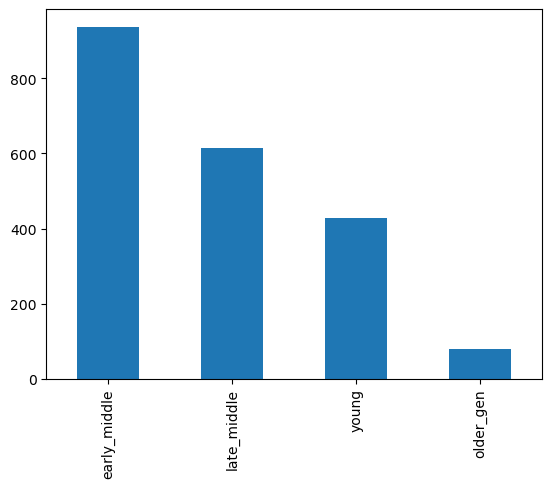

In [64]:
df.age_bins.value_counts().plot(kind='bar')

In [65]:
df.education_level.value_counts()

medium_level    1218
high_level       791
low_level         49
Name: education_level, dtype: int64

**relation between important columns**

In [66]:
imp_cols=list(['age','with_partner','income','children','sum_of_purchases','complain','education_level','recency','total_purchases','offer'])

In [67]:
df.head()

,year_birth,age,age_bins,education,education_level,marital_status,with_partner,income,children,kidhome,teenhome,dt_customer,recency,sum_of_purchases,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,total_purchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,offer,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,57,late_middle,Graduation,medium_level,Single,0,58138.0,0,0,0,04-09-2012,58,1617,635,88,546,172,88,88,3,22,8,10,4,7,1,0,0,0,0,0,0,1
1,1954,60,late_middle,Graduation,medium_level,Single,0,46344.0,2,1,1,08-03-2014,38,27,11,1,6,2,1,6,2,4,1,1,2,5,0,0,0,0,0,0,0,0
2,1965,49,early_middle,Graduation,medium_level,Together,1,71613.0,0,0,0,21-08-2013,26,776,426,49,127,111,21,42,1,20,8,2,10,4,0,0,0,0,0,0,0,0
3,1984,30,young,Graduation,medium_level,Together,1,26646.0,1,1,0,10-02-2014,26,53,11,4,20,10,3,5,2,6,2,0,4,6,0,0,0,0,0,0,0,0
4,1981,33,young,PhD,high_level,Married,1,58293.0,1,1,0,19-01-2014,94,422,173,43,118,46,27,15,5,14,5,3,6,5,0,0,0,0,0,0,0,0


<AxesSubplot:>

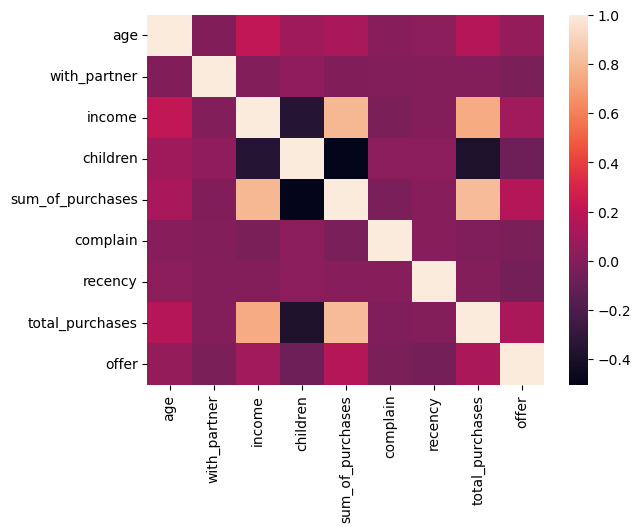

In [68]:
sns.heatmap(df[imp_cols].corr())

In [69]:
df[imp_cols].corr()['recency']

age                 0.021054
with_partner       -0.003131
income              0.000410
children            0.028317
sum_of_purchases    0.013379
complain            0.007340
recency             1.000000
total_purchases     0.001477
offer              -0.053507
Name: recency, dtype: float64

In [70]:
df[imp_cols].corr()['sum_of_purchases']

age                 0.119505
with_partner       -0.015776
income              0.798290
children           -0.503384
sum_of_purchases    1.000000
complain           -0.035124
recency             0.013379
total_purchases     0.817929
offer               0.161296
Name: sum_of_purchases, dtype: float64

In [71]:
df[imp_cols].corr()['offer']

age                 0.054687
with_partner       -0.029437
income              0.096788
children           -0.078585
sum_of_purchases    0.161296
complain           -0.031383
recency            -0.053507
total_purchases     0.133828
offer               1.000000
Name: offer, dtype: float64

In [72]:
df[imp_cols].corr()['complain']

age                 0.013398
with_partner       -0.008140
income             -0.030210
children            0.025835
sum_of_purchases   -0.035124
complain            1.000000
recency             0.007340
total_purchases    -0.018336
offer              -0.031383
Name: complain, dtype: float64

In [73]:
df.head()

,year_birth,age,age_bins,education,education_level,marital_status,with_partner,income,children,kidhome,teenhome,dt_customer,recency,sum_of_purchases,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,total_purchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,offer,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,1957,57,late_middle,Graduation,medium_level,Single,0,58138.0,0,0,0,04-09-2012,58,1617,635,88,546,172,88,88,3,22,8,10,4,7,1,0,0,0,0,0,0,1
1,1954,60,late_middle,Graduation,medium_level,Single,0,46344.0,2,1,1,08-03-2014,38,27,11,1,6,2,1,6,2,4,1,1,2,5,0,0,0,0,0,0,0,0
2,1965,49,early_middle,Graduation,medium_level,Together,1,71613.0,0,0,0,21-08-2013,26,776,426,49,127,111,21,42,1,20,8,2,10,4,0,0,0,0,0,0,0,0
3,1984,30,young,Graduation,medium_level,Together,1,26646.0,1,1,0,10-02-2014,26,53,11,4,20,10,3,5,2,6,2,0,4,6,0,0,0,0,0,0,0,0
4,1981,33,young,PhD,high_level,Married,1,58293.0,1,1,0,19-01-2014,94,422,173,43,118,46,27,15,5,14,5,3,6,5,0,0,0,0,0,0,0,0


<AxesSubplot:>

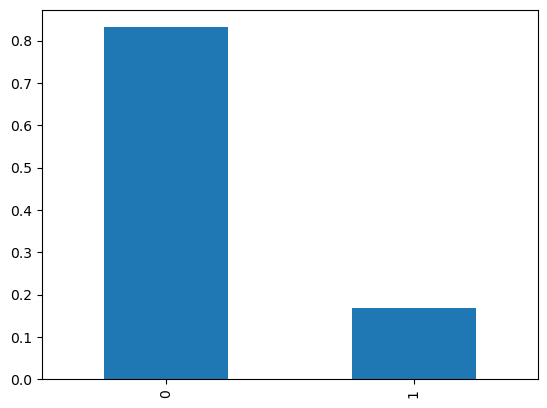

In [74]:
df.offer.value_counts(normalize=True).plot(kind='bar')

### conclusion
* formed a age column from year_birth,there seems to be 2 typing error in year_birth column.we have also created a age_bins column and divided the age into four categories young,early middle,late middle and old_gen.Most number of customer are from 35-50 (early_middle) followed by late middle i,e 51-65.**We can come up with schemes to attract young and older  generation**.

* similarly education level column has been created to capture the level of education .most of the cutomer are graduate level followed by master or phd level.

* with partner column created see if customer lives alone or with a partner .most of the customer are living with partner ,**Couple schmes or couple activity could be given to attract these customer**

* most purchases are done at store followed by web then catalog.

* children ,sum of puchases,total purchases ,offer accepted or not are also added in columns.

* sum of purchases amount is positively correlated with income(65%),offer accepted,total_purchases,age and negatively with children(50%) that means customer with more children spends spends less.**kids's day or family day with special discount and offers could increase the sales** .
* recency is not strongly correlated with any fields.
* complain also does show any relation with other fields.
* **only 16% of total targeted customer have accepted the offer .**

### saving the file into csv file for dashboard creation and presentation in BI Tool.

In [75]:
#df.to_csv('customer_marketing_analysis.csv')

### Data Preprocessing for modeling

In [76]:
dm=df.copy()

In [77]:
dm.drop(['year_birth','age','education','marital_status','dt_customer'],axis=1,inplace=True)#dropping the irrelevent cols

In [78]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer



In [79]:
od=OrdinalEncoder(categories=[['young','early_middle','late_middle','older_gen'],['low_level','medium_level','high_level']])

In [80]:
oc=dm[['age_bins','education_level']]

In [81]:
ct=ColumnTransformer(transformers=[
    ('ordinal',od,list(oc))
],remainder='passthrough')

In [82]:
encoded=ct.fit_transform(dm)

In [83]:
en_df=pd.DataFrame(encoded,columns=dm.columns)

In [84]:
a=list(en_df.columns)

In [85]:
st=ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),(en_df.columns))
],remainder='passthrough')

In [86]:
s_df=pd.DataFrame(st.fit_transform(en_df),columns=a)

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca=PCA(n_components=2)

In [89]:
p=pca.fit_transform(s_df)

In [90]:
from sklearn.cluster import KMeans

In [91]:
pca_data = pd.DataFrame(p,columns=['PC1','PC2']) 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

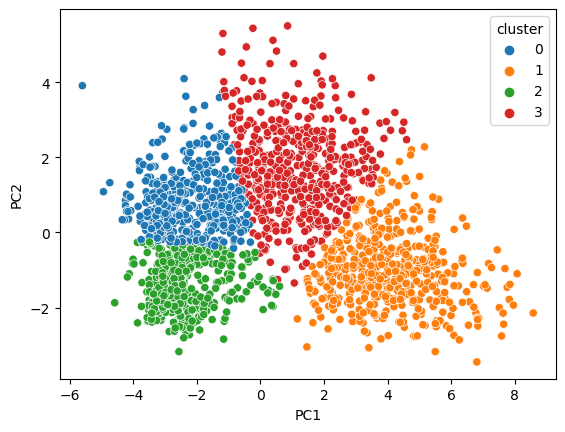

In [94]:
pca_data['cluster'] = pd.Categorical(km.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

<AxesSubplot:>

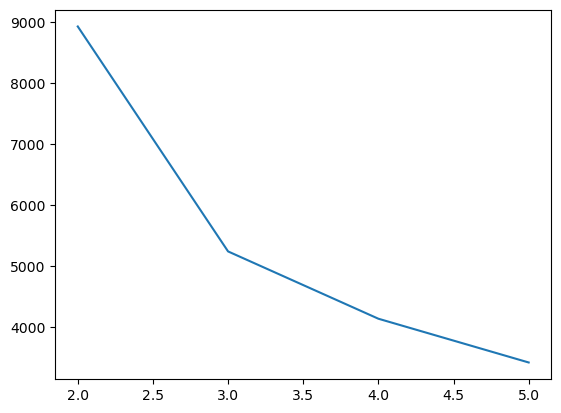

In [104]:
wess=[]
k_values=range(2,6)
for k in k_values:
    km=KMeans(k).fit(p)
    wess.append(km.inertia_)
    
sns.lineplot(x=k_values,y=wess)
    

In [105]:
km=KMeans(n_clusters=3)
cluster=km.fit_predict(p)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

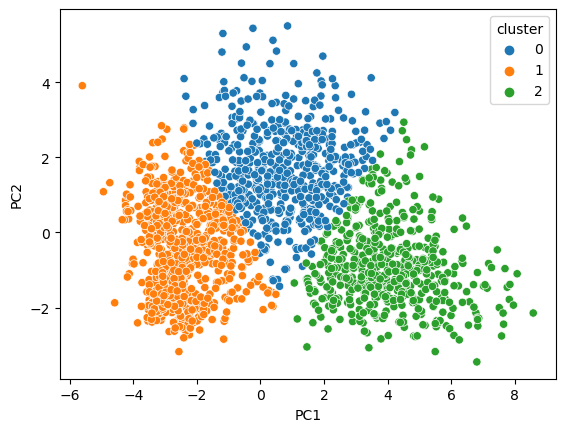

In [106]:
pca_data['cluster'] = pd.Categorical(km.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [109]:
from  sklearn.cluster import AgglomerativeClustering as ac

In [125]:
acc=ac(n_clusters=4)

TypeError: 'AgglomerativeClustering' object is not callable

In [118]:
acm=ac.fit_predict(p)

In [ ]:
#validation using silhoutte score

In [119]:
from sklearn.metrics import silhouette_score as ss

In [121]:
k_ss=ss(p,cluster)
k_ss

0.5015998527762309

In [123]:
ac_ss=ss(p,acm)
ac_ss

0.4998518242944797

**Both K-Means and Agglomerative models are giving same results and out data is not density **

In [ ]:
clus=dm.copy()

In [ ]:
clus['cluster']=cluster

In [ ]:
#clus.to_csv('clustered.csv')

### We have divided the customer in cluster and we can also create seprate dataset for each of the cluster give them  personlized offers .